In [24]:
# Original random selected line_id [Row(line_number='2435', complement='10', line_id=210, direction=1)]
# Shapes candidates 58695 and 53709

In [25]:
import pandas as pd

shape_53709 = pd.read_csv("./testing-map-views-sample-data/1-shapes-direction-AL-file/day_15101_shape_53709.csv",header=None)
shape_58695 = pd.read_csv("./testing-map-views-sample-data/1-shapes-direction-AL-file/day_15101_shape_58695.csv",header=None)
trace_line_210 = pd.read_csv("./testing-map-views-sample-data/1-shapes-direction-AL-file/day_15101_line_210.csv",header=None)

In [26]:
shape_53709.columns = ["shape_id","lat","lon","sequence","dist"]
shape_53709_x = list(shape_53709["lon"])
shape_53709_y = list(shape_53709["lat"])


shape_58695.columns = ["shape_id","lat","lon","sequence","dist"]
shape_58695_x = list(shape_58695["lon"])
shape_58695_y = list(shape_58695["lat"])

trace_line_210.columns = ["dt_avl","line_id","lat","lon","id_avl","hour_avl","hour_diff",'region',"time_variation"]
traces_first_50_x = list(trace_line_210["lon"])[:50]
traces_first_50_y = list(trace_line_210["lat"])[:50]
traces_first_50_hour = list(trace_line_210["dt_avl"])[:50]



In [29]:
# Id avl = bus 35810
trace_line_210["id_avl"][:50]

0     35810
1     35810
2     35810
3     35810
4     35810
5     35810
6     35810
7     35810
8     35810
9     35810
10    35810
11    35810
12    35810
13    35810
14    35810
15    35810
16    35810
17    35810
18    35810
19    35810
20    35810
21    35810
22    35810
23    35810
24    35810
25    35810
26    35810
27    35810
28    35810
29    35810
30    35810
31    35810
32    35810
33    35810
34    35810
35    35810
36    35810
37    35810
38    35810
39    35810
40    35810
41    35810
42    35810
43    35810
44    35810
45    35810
46    35810
47    35810
48    35810
49    35810
Name: id_avl, dtype: int64

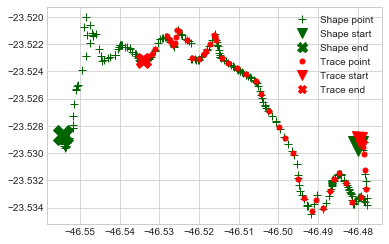

In [30]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-whitegrid')

# Shape 58695 of the trip 2435-10-0 (direction = 0)
plt.plot(shape_58695_x, shape_58695_y, '+', color='darkgreen',markersize=8,label="Shape point")

# Plotting the start/final point of the shape
plt.plot(shape_58695_x[0], shape_58695_y[0], 'v', color='darkgreen',markersize=20,label="Shape start")
plt.plot(shape_58695_x[-1],shape_58695_y[-1], 'X', color='darkgreen',markersize=20,label="Shape end")

plt.plot(traces_first_50_x, traces_first_50_y,".", color='red',markersize=10,label="Trace point")

# Plotting the start/final point of the Trace with line_id = 210
plt.plot(traces_first_50_x[0], traces_first_50_y[0], 'v', color='red',markersize=15,label="Trace start")
plt.plot(traces_first_50_x[-1], traces_first_50_y[-1], 'X', color='red',markersize=15,label="Trace end")


lgnd = plt.legend(loc="upper right", numpoints=1, fontsize=10)


lgnd.legendHandles[0]._legmarker.set_markersize(8)
lgnd.legendHandles[1]._legmarker.set_markersize(10)
lgnd.legendHandles[2]._legmarker.set_markersize(10)
lgnd.legendHandles[3]._legmarker.set_markersize(10)
lgnd.legendHandles[4]._legmarker.set_markersize(10)
lgnd.legendHandles[5]._legmarker.set_markersize(8)

# saving image
plt.savefig('shape-direction-58695.png',bbox_inches='tight',dpi=300)

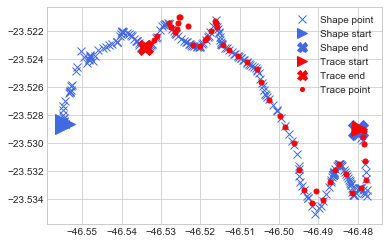

In [31]:
#Shape 53709 of the trip 2435-10-1 (direction = 1)
plt.plot(shape_53709_x, shape_53709_y, 'x', color='royalblue',markersize=8,label="Shape point")

# Plotting the start/final point of the shape
plt.plot(shape_53709_x[0], shape_53709_y[0], '>', color='royalblue',markersize=20,label="Shape start")
plt.plot(shape_53709_x[-1], shape_53709_y[-1], 'X', color='royalblue',markersize=20,label="Shape end")

# Plotting the start/final point of the Trace with line_id = 210
plt.plot(traces_first_50_x[0], traces_first_50_y[0], '>', color='red',markersize=15,label="Trace start")
plt.plot(traces_first_50_x[-1], traces_first_50_y[-1], 'X', color='red',markersize=15,label="Trace end")

plt.plot(traces_first_50_x, traces_first_50_y,".", color='red',markersize=10,label="Trace point")

lgnd = plt.legend(loc="upper right", numpoints=1, fontsize=10)

lgnd.legendHandles[0]._legmarker.set_markersize(8)
lgnd.legendHandles[1]._legmarker.set_markersize(10)
lgnd.legendHandles[2]._legmarker.set_markersize(10)
lgnd.legendHandles[3]._legmarker.set_markersize(10)
lgnd.legendHandles[4]._legmarker.set_markersize(10)
lgnd.legendHandles[5]._legmarker.set_markersize(8)

# Saving image
plt.savefig('shape-direction-53709.png',bbox_inches='tight',dpi=300)

In [36]:
# Results in AL file the direction 1 is equals to direction 0 on GTFS files, and 2 is equals to 1 in the GTFS file

In [32]:
# visualizing shape and trace alignment

import folium
import pandas as pd

shape_columns = ["shape_id","shape_lat","shape_lon","shape_sequence","shape_dist_traveled"]
traces_columns = ["dt_avl","line_id","latitude","longitude","id_avl","hour_avl","hour_diff","region","time_variation"]

trace_line_210 = pd.read_csv("./testing-map-views-sample-data/1-shapes-direction-AL-file/day_15101_line_210.csv",header=None)
shape_58695 = pd.read_csv("./testing-map-views-sample-data/1-shapes-direction-AL-file/day_15101_shape_58695.csv",header=None)

shape_58695.columns = shape_columns

trace_line_210.columns = traces_columns

trace_line_210 = trace_line_210[:50]

shape_58695_coords = shape_58695[["shape_lat","shape_lon"]].values.tolist()
traces_coords = trace_line_210[["latitude","longitude"]].values.tolist()

map_folium = folium.Map([-23.477476,-46.610409], zoom_start=13)

tile = folium.TileLayer('cartodbpositron').add_to(map_folium)


for coord in shape_58695_coords:
    icon = folium.features.CustomIcon('green-point.png', icon_size=(10,10))
    folium.Marker(coord,icon=icon).add_to(map_folium)
    
    
for coord in traces_coords:
    icon = folium.features.CustomIcon('red-point.png', icon_size=(10,10))
    folium.Marker(coord,icon=icon).add_to(map_folium)

    
map_folium.save("visualizing-traces-and-shapes-alignments-line_210-day-2015-10-01-shape-58695_35810.html")

In [19]:
traces_columns = ["dt_avl","line_id","latitude","longitude","id_avl","hour_avl","hour_diff","region","time_variation"]

traces = pd.read_csv("./testing-map-views-sample-data/1-shapes-direction-AL-file/day_15101_line_210.csv",header=None)
traces.columns = traces_columns


In [22]:
traces["id_avl"].unique() # --> a line can have more than one bus

array([35810, 35638, 35664, 35393, 35113, 35070])